# Main

## Step-by-step scenario execution

In [8]:
import json
import shutil
import logging
import importlib
import numpy as np
import pandas as pd
import tensorflow as tf

from utils import *
from models import *
from datasets import set_dataset_dir
from custom_train_objects.generators import EEGGrouperGenerator
from experiments import data_utils, model_utils, scenarios_utils, scenarios

logger = logging.getLogger(__name__)

# files have to be in data/Large_Scale_BCI/*
set_dataset_dir('data')
set_display_options()

for module in (model_utils, data_utils, scenarios_utils, scenarios): importlib.reload(module)

# this model is based on embeddings
name = 'eegtcnet_fit_ds-largescalebci_ge2e_metric-euclidian_nlab-5_nut-24_dim-32_ea_norm-no_winoff-0_winlen-250_passive_subj-B_scenario-1'

# This model is based on classification score for each label
#name = 'eegtcnet_fit_ds-largescalebci_ea_norm-no_winoff-0_winlen-250_passive_subj-B_scenario-1'

name = scenarios_utils.format_model_name(name, subject = range(1, 10))

config = scenarios._get_scenario_config(name, gpu = 0)
scenarios_utils.validate_scenario_config(config)

scenarios._setup_gpu_config(config)

random_state = None if not isinstance(config['run'], int) else config['run']
if random_state is not None:
    np.random.seed(random_state)
    tf.random.set_seed(random_state)

train, valid, test, config = data_utils.get_experimental_data(
    config, random_state = random_state
)
# to remove data that are not long enough for the model as it requires fixed length input data
train = train[train['time'] == 250]
valid = valid[valid['time'] == 250]
test = test[test['time'] == 250]

#scenarios_utils.validate_scenario_data(config, train = train, valid = valid, test = test)
model, config = model_utils.build_model(name, config)

filepath =  '{}/best_weights.keras'.format(model.save_dir)
if model.epochs == 0 and not os.path.exists(filepath) and not config['skip_new']:
    config['train_config']['test_size'] = 0
    scenarios.fit_model(model, config, train = train, valid = valid, filepath = filepath)
# load the best model weights
model.load_weights(filepath)
# evaluate the model on the test subset
# metrics = scenarios.evaluate_model(
#     model = model, data = test, config = config, filepath = filepath, samples = train, overwrite = False
# )

#config['metrics'] = scenarios._get_metrics(name, config = config, metrics = metrics)

#print(json.dumps(to_json(config), indent = 4))

Error while setting visible devices : list index out of range
Loading dataset largescalebci...


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-151110-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-151110-5St-SGLHand.fif, 22 x 724600 (3623.0 s), ~121.6 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'middle finger (IM)', 'pinkie finger (IM)'}


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-160309-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-160309-5St-SGLHand.fif, 22 x 715588 (3577.9 s), ~120.1 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'relaxation', 'middle finger (IM)', 'pinkie finger (IM)'}


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-160311-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-160311-5St-SGLHand.fif, 22 x 718265 (3591.3 s), ~120.6 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'break', 'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'relaxation', 'middle finger (IM)', 'pinkie finger (IM)'}


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-160316-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-160316-5St-SGLHand.fif, 22 x 717984 (3589.9 s), ~120.5 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'break', 'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'relaxation', 'middle finger (IM)', 'pinkie finger (IM)'}

Dataset information

General :
  - sampling rate  : 200
  - # EEG channels : 22
  - Labels (n = 8) : ['break', 'thumb finger (IM)', 'ring finger (IM)', 'passive', 'index finger (IM)', ...]

# Samples :
  - Train size    : 4900
  - Valid size    : 1225
  - Test size     : 1532
  - valid == test : False

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  

In [ ]:
from keras.utils import plot_model
# show the model information / summary of the architecture
print(model)
model.summary()
plot_model(model.model)

### Making prediction with the embeddings based model (i.e., with `ge2e` in its name)

An embedding model encode EEG sample on a 64-d vector, named the *embedding*. Then, it uses the *reference points* (i.e., embeddings from the training dataset) to classify the new data based on a K-Nearest Neighbor (KNN) strategy

This cell encodes each subset (train and test) for further evaluation

### Step by step evaluation

In [19]:
model.load_weights(filepath)

encoder = model if not hasattr(model, 'encoder') else model.encoder

train_samples = pd.concat([train, valid])
test_samples  = test


_labels = ('passive', 'Finger 1 (thumb)', 'Finger 3 (middle)', 'Finger 4', 'Finger 5 (pinkie)')
#_labels = None
if _labels:
    train_samples = train_samples[train_samples['label'].apply(lambda l: any(lab in l for lab in _labels))]
    test_samples = test_samples[test_samples['label'].apply(lambda l: any(lab in l for lab in _labels))]

# This creates embeddings for all the training and test data subsets
train_samples = model.build_samples(train_samples, model = encoder)
test_samples  = model.build_samples(test_samples, model = encoder)

print('Train samples : {}\ntest samples  : {}'.format(
    {k : v.shape for k, v in train_samples.items()}, {k : v.shape for k, v in test_samples.items()}
))

Train samples : {'ids': (2783,), 'channels': (2783, 22), 'embeddings': TensorShape([2783, 32]), 'labels': TensorShape([2783])}
test samples  : {'ids': (693,), 'channels': (693, 22), 'embeddings': TensorShape([693, 32]), 'labels': TensorShape([693])}


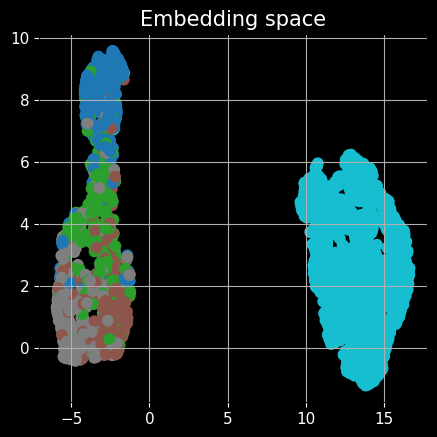

In [20]:
# visualize the training embeddings, each point represent an EEG trial, and colors represent a label
plot_embedding(train_samples['embeddings'], train_samples['labels'])

Matrix shape : (2783, 693)


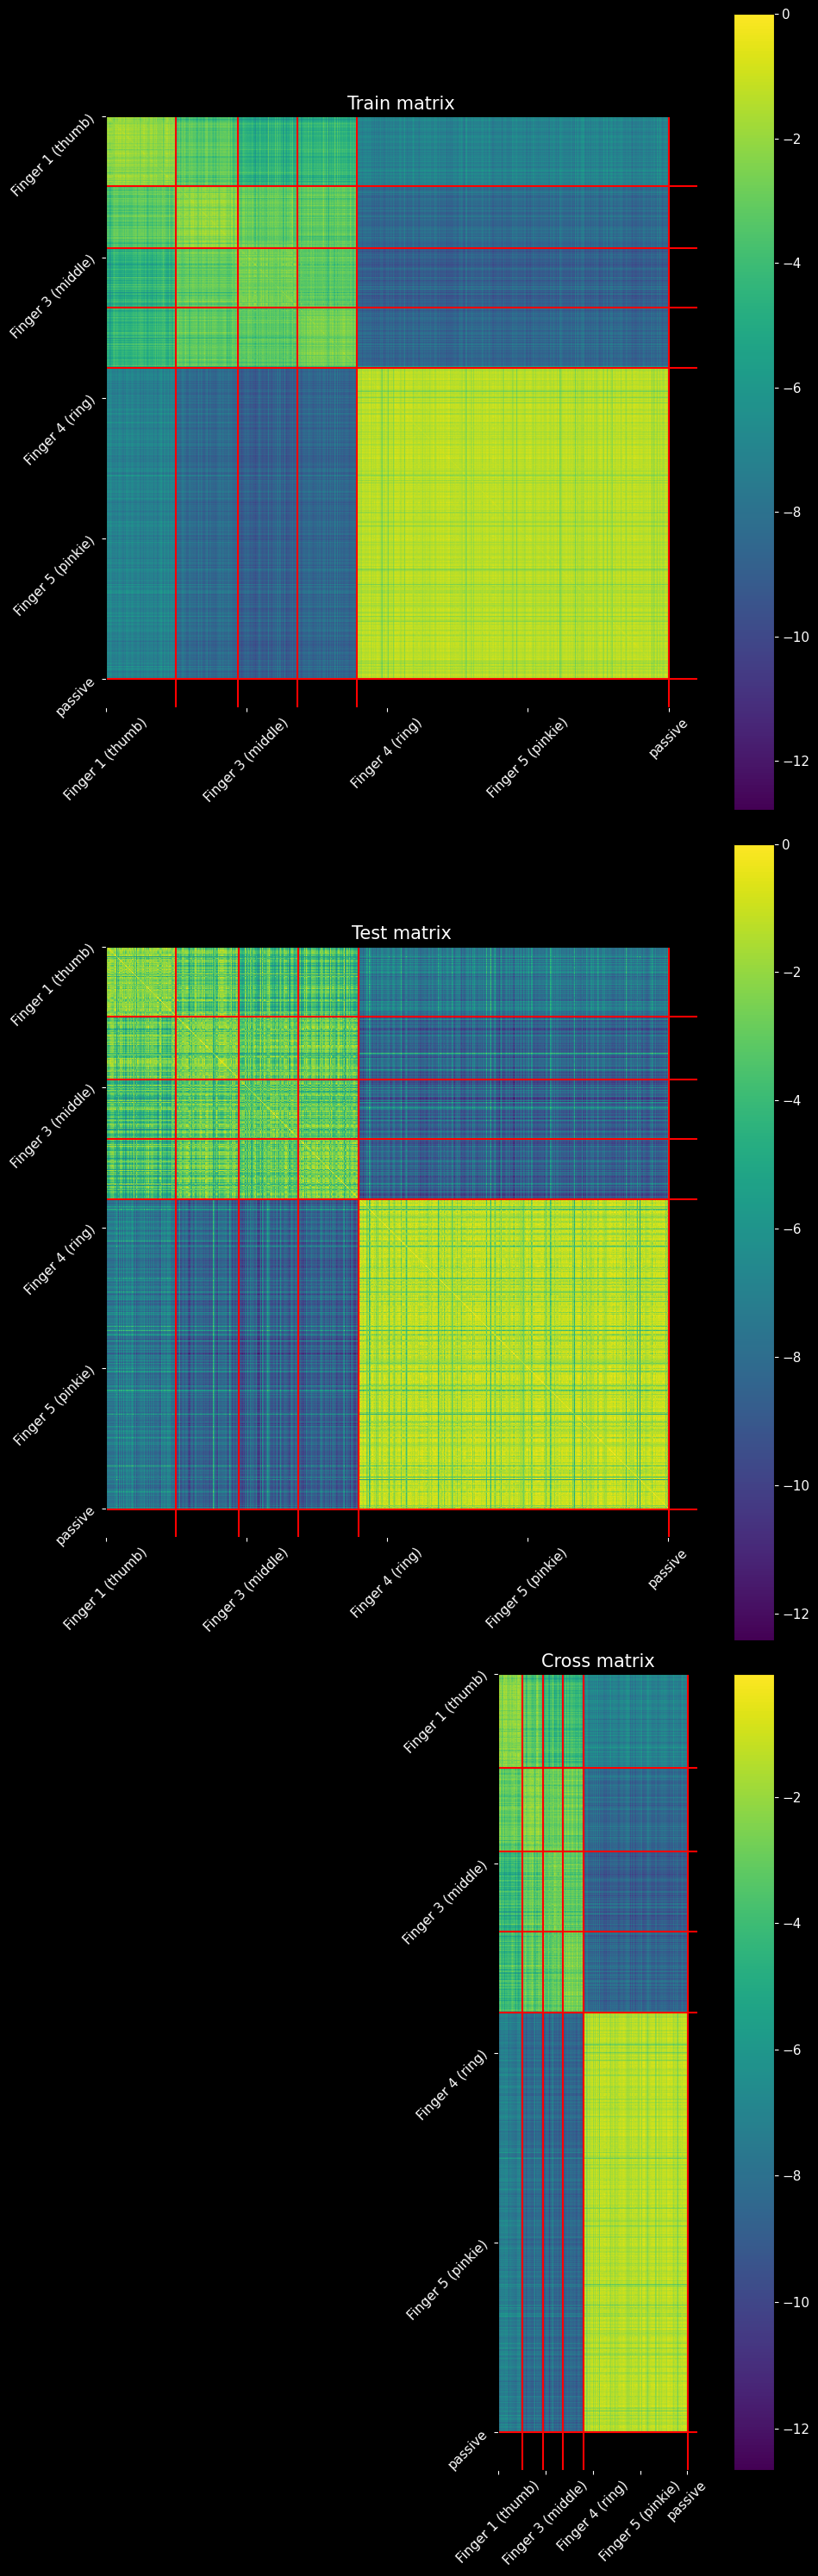

In [21]:
def reorder_samples(samples):
    embeddings, labels = samples['embeddings'], samples['labels']
    if hasattr(labels, 'numpy'): labels = labels.numpy()
    if hasattr(embeddings, 'numpy'): embeddings = embeddings.numpy()
    if len(embeddings.shape) == 3:
        embeddings, labels = np.reshape(embeddings, [-1, embeddings.shape[-1]]), np.reshape(labels, [-1])
    
    order = np.argsort(labels)
    
    labels = labels[order]
    embed  = embeddings[order]
    
    unique_ids, int_ids = tf.unique(labels)
    return embed, convert_to_str(unique_ids), int_ids, np.cumsum(np.bincount(int_ids))

train_embed, train_ids, train_idx, train_lines = reorder_samples(train_samples)
test_embed, test_ids, test_idx, test_lines = reorder_samples(test_samples)

kwargs = {'method' : getattr(model, 'distance_metric', 'euclidian'), 'force_distance' : True, 'as_matrix' : True, 'max_matrix_size' : -1}
matrix = distance(train_embed, test_embed, ** kwargs)

matrices = {
    'Train matrix' : {
        'x' : - distance(train_embed, train_embed, ** kwargs),
        'xtick_labels' : train_ids, 'ytick_labels' : train_ids, 'hlines' : train_lines, 'vlines' : train_lines
    },
    'Test matrix' : {
        'x' : - distance(test_embed, test_embed, ** kwargs),
        'xtick_labels' : test_ids, 'ytick_labels' : train_ids, 'hlines' : test_lines, 'vlines' : test_lines
    },
    'Cross matrix' : {
        'x' : - matrix,
        'xtick_labels' : test_ids, 'ytick_labels' : test_ids, 'hlines' : train_lines, 'vlines' : test_lines
    }
}

print('Matrix shape : {}'.format(matrix.shape))
plot_multiple(** matrices, ncols = 1, plot_type = 'matrix', use_subplots = True, x_size = 10, y_size = 10)

Accuracy for k = -1	: 80.09 %
Accuracy for k = 5	: 80.38 %
Accuracy for k = 10	: 79.65 %
Accuracy for k = 15	: 80.09 %
Accuracy for k = 20	: 81.39 %
Accuracy for k = 25	: 80.81 %
Accuracy for k = 30	: 80.95 %
Accuracy for k = 35	: 80.66 %
Accuracy for k = 40	: 80.52 %
Accuracy for k = 45	: 80.38 %
Accuracy for k = 50	: 80.52 %
Accuracy for k = 55	: 80.81 %
Accuracy for k = 60	: 80.81 %
Accuracy for k = 65	: 80.52 %
Accuracy for k = 70	: 80.52 %
Accuracy for k = 100	: 80.66 %
Accuracy for k = 200	: 80.95 %


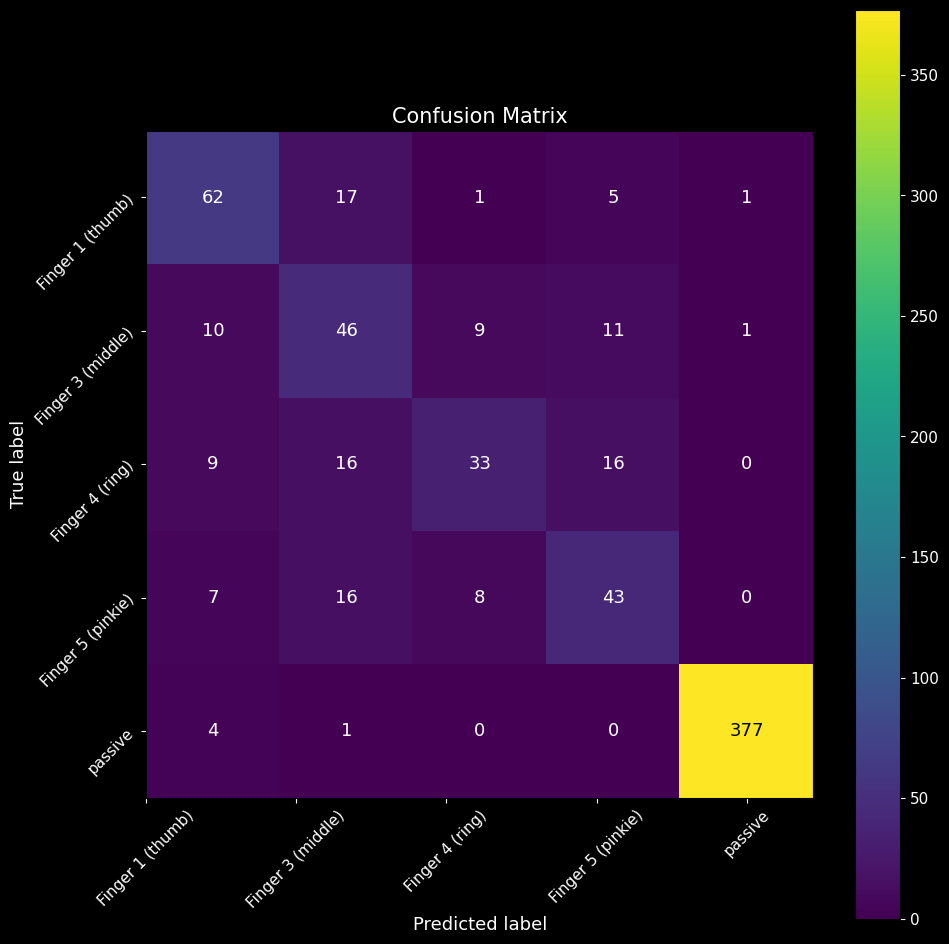

In [22]:
metric = getattr(model, 'distance_metric', 'euclidian')
#metric = 'dp'

for k in [-1] + list(range(5, 75, 5)) + [100, 200]:
    ids, embeddings = compute_centroids(train_embed, train_idx) if k == -1 else (train_idx, train_embed)
    pred = knn(
        test_embed, embeddings, distance_metric = metric, k = max(1, k), ids = ids, weighted = True
    )
    acc = pred == test_idx
    print('Accuracy for k = {}\t: {:.2f} %'.format(k, 100 * np.mean(acc)))
plot_confusion_matrix(true = test_idx, pred = pred, labels = convert_to_str(test_ids), factor_size = 2)

### Step by step prediction

To predict on new data, we first have to compute the reference embeddings (with the build_samples() function), then encode the new data to classify, and finally call the KNN classifier

In [12]:
from datasets import get_dataset

encoder = model if not hasattr(model, 'encoder') else model.encoder
# load the complete dataset of raw data and remove the 1st relaxation phase + the index finger
real_data = get_dataset('large_scale_bci', subset = '5F', subject = 'B', keep_passive = True, keep_artifact = True).iloc[1:]
print(real_data)
_labels = ('Finger 1 (thumb)', 'Finger 2 (index)', 'Finger 3 (middle)', 'Finger 4', 'Finger 5 (pinkie)')
_labels = None
real_data['label'] = real_data['event_id']
if _labels:
    real_data = real_data[real_data['label'].apply(lambda l: any(lab in l for lab in _labels))]

# we take 25% of the data as reference points
n = len(real_data) // 4
calibration_data, real_data = real_data.iloc[:n], real_data.iloc[n:]

#concatenate all the trials in a single long EEG recording
real_eeg = np.concatenate(list(real_data['eeg'].values), axis = 1)
print(real_eeg.shape)

#pre-processing
calibration_data['eeg'] = calibration_data['eeg'].apply(lambda eeg: eeg[:, :model.max_input_length])
calibration_data = calibration_data[calibration_data['eeg'].apply(lambda eeg: eeg.shape[1] == 250)]
# we create reference embeddings along with their ID (known thanks to calibration time)
calibration_data = train
train_samples = model.build_samples(calibration_data, model = encoder)

print('Train samples : {}'.format(
    {k : v.shape for k, v in train_samples.items()}
))

real_data.head()

Loading dataset largescalebci...


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-151110-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-151110-5St-SGLHand.fif, 22 x 724600 (3623.0 s), ~121.6 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'middle finger (IM)', 'pinkie finger (IM)'}


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-160309-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-160309-5St-SGLHand.fif, 22 x 715588 (3577.9 s), ~120.1 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'relaxation', 'middle finger (IM)', 'pinkie finger (IM)'}


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-160311-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-160311-5St-SGLHand.fif, 22 x 718265 (3591.3 s), ~120.6 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'break', 'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'relaxation', 'middle finger (IM)', 'pinkie finger (IM)'}


c:\Data\hackaton_2024\utils\eeg_utils\eeg_io.py:311: RuntimeWarning: This filename (data/Large_scale_BCI\5F-SubjectB-160316-5St-SGLHand.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data   = getattr(mne.io, io_method)(filename, preload = add_signal, verbose = False) if isinstance(filename, str) else filename


The file <Raw | 5F-SubjectB-160316-5St-SGLHand.fif, 22 x 717984 (3589.9 s), ~120.5 MB, data loaded> does not have any subject information !
Unknown events detected !
  Mapping : {0: 'passive', 1: 'Finger 1 (thumb)', 2: 'Finger 2 (index)', 3: 'Finger 3 (middle)', 4: 'Finger 4 (ring)', 5: 'Finger 5 (pinkie)', 90: 'passive', 91: 'passive', 92: 'experiment end', 99: 'passive'}
  Unknown : {'break', 'thumb finger (IM)', 'ring finger (IM)', 'index finger (IM)', 'relaxation', 'middle finger (IM)', 'pinkie finger (IM)'}
                event_id   start     end  time          event_name   age   sex meas_date  rate  \
1      thumb finger (IM)   37376   37641   265   thumb finger (IM)  None  None    151110   200   
2                passive   37641   38078   437             passive  None  None    151110   200   
3      index finger (IM)   38078   38338   260   index finger (IM)  None  None    151110   200   
4                passive   38338   38699   361             passive  None  None    151110  

,event_id,start,end,time,event_name,age,sex,meas_date,rate,channels,eeg,id,task,device,label,n_channels,dataset_name,session
1915,thumb finger (IM),722076,722338,262,thumb finger (IM),None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-5e-08, -2.7e-06, -1.78e-06, -1.04e-06, 1.6e...",Large scale BCI-B,5f,EEG 1200,thumb finger (IM),22,Large scale BCI,Large scale BCI-B-151110
1916,passive,722338,724600,2262,passive,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[1.62e-06, -1.08e-06, -4.23e-06, -3.5e-06, 1....",Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110
1917,passive,0,30083,30083,passive,None,None,160309,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[1.270139e-07, -1.2701786e-07, 1.270222e-07, ...",Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-160309
1918,relaxation,30083,30289,206,relaxation,None,None,160309,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[5.8822214e-05, 5.8698064e-05, 6.5396336e-05,...",Large scale BCI-B,5f,EEG 1200,relaxation,22,Large scale BCI,Large scale BCI-B-160309
1919,passive,30288,31091,803,passive,None,None,160309,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-4.4697713e-06, -4.316596e-06, -3.3530757e-0...",Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-160309


In [15]:
reference_ids, reference_embeddings = train_samples['labels'], train_samples['embeddings']

subj_id = real_data.iloc[0]['id']
rate = real_data.iloc[0]['rate']
channels = real_data.iloc[0]['channels']
window_len = int(1. * rate)

labels = np.unique(reference_ids)

for i in range(100):
    data = real_eeg[:, i * window_len : i * window_len + model.max_input_length]
    embedded = encoder(model.get_input({
        'eeg' : data, 'rate' : rate, 'channels' : channels, 'id' : subj_id
    })[None], training = False)
    ids, scores = knn(
        embedded, reference_embeddings, ids = reference_ids, distance_metric = 'euclidian', k = 50, weighted = False, return_scores = True
    )
    scores = scores[0]
    print('The prediction is index {} ({}) with probabilities : {}'.format(
        np.argmax(scores), ids[np.argmax(scores)].numpy().decode(), scores
    ))
    print(convert_to_str(ids), tf.one_hot(np.argmax(scores), 5).numpy())


The prediction is index 2 (thumb finger (IM)) with probabilities : [18.  1. 24.  4.  0.  3.  0.]
['index finger (IM)', 'ring finger (IM)', 'thumb finger (IM)', 'middle finger (IM)', 'passive', 'pinkie finger (IM)', 'break'] [0. 0. 1. 0. 0.]
The prediction is index 5 (pinkie finger (IM)) with probabilities : [ 6.  6.  7.  6. 11. 14.  0.]
['index finger (IM)', 'ring finger (IM)', 'thumb finger (IM)', 'middle finger (IM)', 'passive', 'pinkie finger (IM)', 'break'] [0. 0. 0. 0. 0.]
The prediction is index 2 (thumb finger (IM)) with probabilities : [ 8.  0. 21.  2. 18.  1.  0.]
['index finger (IM)', 'ring finger (IM)', 'thumb finger (IM)', 'middle finger (IM)', 'passive', 'pinkie finger (IM)', 'break'] [0. 0. 1. 0. 0.]
The prediction is index 4 (passive) with probabilities : [ 0.  2.  1.  1. 40.  6.  0.]
['index finger (IM)', 'ring finger (IM)', 'thumb finger (IM)', 'middle finger (IM)', 'passive', 'pinkie finger (IM)', 'break'] [0. 0. 0. 0. 1.]
The prediction is index 4 (passive) with prob

In [2]:
import os
import importlib
import numpy as np
import pandas as pd

from tqdm import tqdm

from experiments import scenarios, data_utils, get_experimental_data, build_model, validate_scenario_data
from experiments.scenarios import _setup_gpu_config, _get_scenario_config, _get_metrics

importlib.reload(data_utils)

model_name = 'atcnet_orig_subj-1-2-3-4-5-6-7-8-9_run-0_lss_scenario-2'

config = _get_scenario_config(model_name, gpu = 0)

_setup_gpu_config(config, gpu = 0)

train, valid, test, config = data_utils.get_experimental_data(
    config, random_state = config['run']
)

validate_scenario_data(config, train = train, valid = valid, test = test)

model, config = build_model(model_name, config)

2024-02-15 09:31:52.362809: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-15 09:31:52.393612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 09:31:52.393640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 09:31:52.394374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 09:31:52.399188: I tensorflow/core/platform/cpu_feature_guar

Instructions for updating:
experimental_follow_type_hints is deprecated
Loading dataset bci-iv_2a...


2024-02-15 09:32:15.946880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14948 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5


`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 22
  - Labels (n = 36) : ['BCI-IV 2a-7-left hand (IM)', 'BCI-IV 2a-4-right hand (IM)', 'BCI-IV 2a-2-feet (IM)', 'BCI-IV 2a-4-left hand (IM)', 'BCI-IV 2a-7-tongue (IM)', ...]

# Samples :
  - Train size    : 4147
  - Valid size    : 1037
  - Test size     : 1037
  - valid == test : True

Subjects :
  - # subject(s) in train : 9
  - # subject(s) in valid : 9
  - # subject(s) in test  : 9
  - # subject(s) in train and valid : 9
  - # subject(s) in train and test  : 9

Sessions :
  - # session(s) in train : 18
  - # session(s) in valid : 18
  - # session(s) in test  : 18
  - # session(s) in train and valid : 18
  - # session(s) in train and test  : 18

Model restoration...
Model model has not been restored due to an exception : Requested the deserialization of a Lambda layer with a Python `lambda` inside it. This c

In [3]:
importlib.reload(scenarios)

config['metrics'] = scenarios._get_metrics(model_name, config)

config

{'scenario': 2,
 'model_name': 'atcnet_orig_subj-1-2-3-4-5-6-7-8-9_run-0_lss_scenario-2',
 'model_type': 'classifier',
 'pretrained': None,
 'skip_new': False,
 'scenario_config': {'train_on_multi_subjects': True},
 'dataset_config': {'task': 'classification',
  'test_task': 'classification',
  'dataset': 'bci-iv_2a',
  'subjects': ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
  'loso': 0,
  'val_split': None,
  'test_split': 0.2,
  'per_user_label': True,
  'time_window': 4.5,
  'offset': 1.5,
  'test_sessions': 0},
 'model_config': {'nom': 'atcnet_orig_subj-1-2-3-4-5-6-7-8-9_run-0_lss_scenario-2',
  'rate': 250,
  'architecture_name': 'atcnet',
  'normalization_config': {'normalize': <EEGNormalization.GLOBAL_NORMAL: 5>,
   'per_channel': True},
  'keep_spatial_information': 'auto',
  'max_input_length': 4.5,
  'use_fixed_length_input': True,
  'channels': ['EEG-1',
   'EEG-2',
   'EEG-3',
   'EEG-4',
   'EEG-5',
   'EEG-6',
   'EEG-7',
   'EEG-8',
   'EEG-9',
   'EEG-10',
   'EEG-11

In [5]:
filepath = model.save_dir + '/best_weights.keras'
model.load_weights(filepath)
pred = model.predict(test, mask_by_id = True)

print(np.mean([v for k, v in config['metrics'].items() if 'masked' in k and v is not None]))
print(np.mean(np.array([p['pred'] for p in pred]) == test['label'].values))

0.8273294568061829
0.8273866923818708


In [9]:
import os
import json
import logging
import numpy as np
import pandas as pd

from utils import to_json

logger = logging.getLogger(__name__)

importlib.reload(scenarios)

metrics = scenarios.evaluate_model(
    model, config, data = test, filepath = filepath, save = False
)
metrics

Model `atcnet_orig_subj-1-2-3-4-5-6-7-8-9_run-0_lss_scenario-2` metrics : {
    "test_accuracy": 0.8273866923818708,
    "test_subj-BCI-IV 2a-1_accuracy": 0.8620689655172413,
    "test_subj-BCI-IV 2a-2_accuracy": 0.6810344827586207,
    "test_subj-BCI-IV 2a-3_accuracy": 0.9217391304347826,
    "test_subj-BCI-IV 2a-4_accuracy": 0.7739130434782608,
    "test_subj-BCI-IV 2a-5_accuracy": 0.8608695652173913,
    "test_subj-BCI-IV 2a-6_accuracy": 0.7368421052631579,
    "test_subj-BCI-IV 2a-7_accuracy": 0.896551724137931,
    "test_subj-BCI-IV 2a-8_accuracy": 0.8508771929824561,
    "test_subj-BCI-IV 2a-9_accuracy": 0.8620689655172413
}
Model `atcnet_orig_subj-1-2-3-4-5-6-7-8-9_run-0_lss_scenario-2` metrics : {
    "test_masked_accuracy": 0.8273866923818708,
    "test_masked_subj-BCI-IV 2a-1_accuracy": 0.8620689655172413,
    "test_masked_subj-BCI-IV 2a-2_accuracy": 0.6810344827586207,
    "test_masked_subj-BCI-IV 2a-3_accuracy": 0.9217391304347826,
    "test_masked_subj-BCI-IV 2a-4_accuracy

{'test_accuracy': 0.8273866923818708,
 'test_subj-BCI-IV 2a-1_accuracy': 0.8620689655172413,
 'test_subj-BCI-IV 2a-2_accuracy': 0.6810344827586207,
 'test_subj-BCI-IV 2a-3_accuracy': 0.9217391304347826,
 'test_subj-BCI-IV 2a-4_accuracy': 0.7739130434782608,
 'test_subj-BCI-IV 2a-5_accuracy': 0.8608695652173913,
 'test_subj-BCI-IV 2a-6_accuracy': 0.7368421052631579,
 'test_subj-BCI-IV 2a-7_accuracy': 0.896551724137931,
 'test_subj-BCI-IV 2a-8_accuracy': 0.8508771929824561,
 'test_subj-BCI-IV 2a-9_accuracy': 0.8620689655172413,
 'test_masked_accuracy': 0.8273866923818708,
 'test_masked_subj-BCI-IV 2a-1_accuracy': 0.8620689655172413,
 'test_masked_subj-BCI-IV 2a-2_accuracy': 0.6810344827586207,
 'test_masked_subj-BCI-IV 2a-3_accuracy': 0.9217391304347826,
 'test_masked_subj-BCI-IV 2a-4_accuracy': 0.7739130434782608,
 'test_masked_subj-BCI-IV 2a-5_accuracy': 0.8608695652173913,
 'test_masked_subj-BCI-IV 2a-6_accuracy': 0.7368421052631579,
 'test_masked_subj-BCI-IV 2a-7_accuracy': 0.8965517

In [25]:
import json
import importlib

from utils import set_display_options
from experiments import data_utils, model_utils, scenarios

set_display_options()

for module in (model_utils, data_utils, scenarios): importlib.reload(module)

model_name = 'atcnet_task-cli_subj-1_run-10'

config = scenarios._get_scenario_config(model_name)
train, val, test, config = data_utils.get_experimental_data(config)
print(json.dumps(config, indent = 4))

print(train.head())
print(test.head())

Loading dataset bciiv2a...

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1

Labels :
  - Label in train (n = 88) : ['right hand (IM)-EEG-3', 'feet (IM)-EEG-20', 'left hand (IM)-EEG-15', 'feet (IM)-EEG-17', 'left hand (IM)-EEG-17', ...]
  - Label in valid (n = 88) : ['feet (IM)-EEG-20', 'right hand (IM)-EEG-3', 'left hand (IM)-EEG-15', 'feet (IM)-EEG-17', 'left hand (IM)-EEG-17', ...]
  - Label in test  (n = 4) : {'feet (IM)', 'tongue (IM)', 'left hand (IM)', 'right hand (IM)'}
  - # label(s) in train and valid : 88
  - # label(s) in train and test  : 0

# Samples :
  - Train size    : 5060
  - Valid size    : 1276
  - Test size     : 288
  - valid == test : False

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # sessio

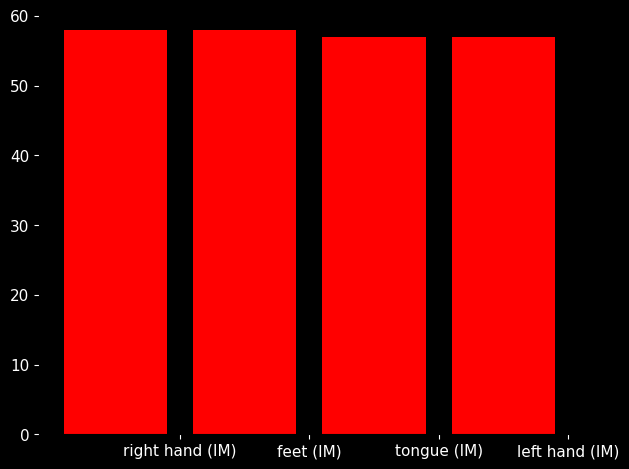

label
right hand (IM)    58
feet (IM)          58
tongue (IM)        57
left hand (IM)     57
Name: count, dtype: int64

In [24]:
from utils import plot

plot(train['label'].value_counts().to_dict(), plot_type = 'bar')
train['label'].value_counts()

In [5]:
import json
import importlib
import tensorflow as tf

from datasets import get_dataset, prepare_dataset
from custom_train_objects.generators import eeg_generator

try:
    tf.config.set_visible_devices([], 'GPU')
except:
    pass

In [9]:
data = get_dataset('bci-iv_2a', modes = 'train', subjects = 1)

print('Dataset columns : {}'.format(list(data.columns)))
print('# data : {}'.format(len(data)))

Loading dataset bciiv2a...
Dataset columns : ['event_id', 'start', 'end', 'time', 'age', 'sex', 'meas_date', 'event_name', 'artifact', 'rate', 'channels', 'eeg', 'id', 'session', 'label', 'n_channels', 'dataset_name']
# data : 288


In [10]:
importlib.reload(eeg_generator)

generator = eeg_generator.EEGGrouperGenerator(
    data, n_utterance = 4, n_round = 10
)
print(generator)

EEGGrouper Generator :
- Length : 160
- Unique ids   : 4
- Total files  : 160
- Unique files : 120 (75.00 %)
- Cache size   : 0 (loaded : 0.00 %)


In [13]:
dataset = prepare_dataset(generator, batch_size = 16, padded_batch = True)
for batch in dataset.take(5):
    print(batch['label'])


tf.Tensor(
[b'feet (IM)' b'feet (IM)' b'feet (IM)' b'feet (IM)' b'left hand (IM)'
 b'left hand (IM)' b'left hand (IM)' b'left hand (IM)' b'right hand (IM)'
 b'right hand (IM)' b'right hand (IM)' b'right hand (IM)' b'tongue (IM)'
 b'tongue (IM)' b'tongue (IM)' b'tongue (IM)'], shape=(16,), dtype=string)
tf.Tensor(
[b'feet (IM)' b'feet (IM)' b'feet (IM)' b'feet (IM)' b'left hand (IM)'
 b'left hand (IM)' b'left hand (IM)' b'left hand (IM)' b'right hand (IM)'
 b'right hand (IM)' b'right hand (IM)' b'right hand (IM)' b'tongue (IM)'
 b'tongue (IM)' b'tongue (IM)' b'tongue (IM)'], shape=(16,), dtype=string)
tf.Tensor(
[b'feet (IM)' b'feet (IM)' b'feet (IM)' b'feet (IM)' b'left hand (IM)'
 b'left hand (IM)' b'left hand (IM)' b'left hand (IM)' b'right hand (IM)'
 b'right hand (IM)' b'right hand (IM)' b'right hand (IM)' b'tongue (IM)'
 b'tongue (IM)' b'tongue (IM)' b'tongue (IM)'], shape=(16,), dtype=string)
tf.Tensor(
[b'feet (IM)' b'feet (IM)' b'feet (IM)' b'feet (IM)' b'left hand (IM)'
 b'lef

2024-02-19 10:18:27.713657: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
